Шаг 1. Откройте файл с данными и изучите общую информацию


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Шаг 2. Подготовьте данные<br>
<i>Замените названия столбцов (приведите к нижнему регистру);</i>

In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип
данных и почему;



In [5]:
df['year_of_release'] = pd.to_numeric(df['year_of_release'], downcast='integer')
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float')
df['critic_score'] = pd.to_numeric(df['critic_score'], downcast='integer')
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Для улучшения структуры данных мы провели следующие замены типов данных: преобразовать год выпуска (Year_of_Release) из вещественного в целочисленный формат, конвертировать оценки пользователей и критиков `user_score`, `critic_score` в числовой тип данных и заменилив нем 'tbd', 'tbd' означает "To Be Determined" и указывает на то, что оценка пока не определена, на 'nan', чтобы в дальнейшем удобно было анализировать данные в целочисленном виде.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Обработайте пропуски при необходимости

In [21]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['rating'] = df['rating'].fillna('No ESRB')
df['user_score'] = df['user_score'].fillna(-1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,No ESRB
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,No ESRB
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,No ESRB
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,No ESRB
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,No ESRB
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,No ESRB



Столбец `critic_score` (оценка критиков) может содержать пропуски, возможно, из-за отсутствия общепринятой практики оценок в прошлом. Чтобы не искажать данные, присвоим им значение -1, чтобы легко отличать их от реальных оценок.

Столбец `rating` (рейтинг от ESRB) также может быть пустым из-за отсутствия организации ESRB в прошлом. Присвоим им значение "No ESRB" для обозначения отсутствия рейтинга.

Аналогично, столбец `user_score` (оценка пользователей) может иметь пропуски из-за отсутствия платформ для сбора таких данных в прошлом. Заполним их значением -1.

Столбец `year_of_release` (год выпуска) содержит небольшое количество пропусков. Оставим их без изменений, замена может повлиять на анализ данных.

Это позволит сохранить данные в их естественном состоянии и обеспечит легкость работы с пропущенными значениями в будущем.

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный
столбец.

In [22]:
df['sales_total'] = 0

df['sales_total'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,No ESRB,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,No ESRB,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,No ESRB,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,No ESRB,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,No ESRB,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,No ESRB,0.01


Шаг 3. Проведите исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все
периоды?

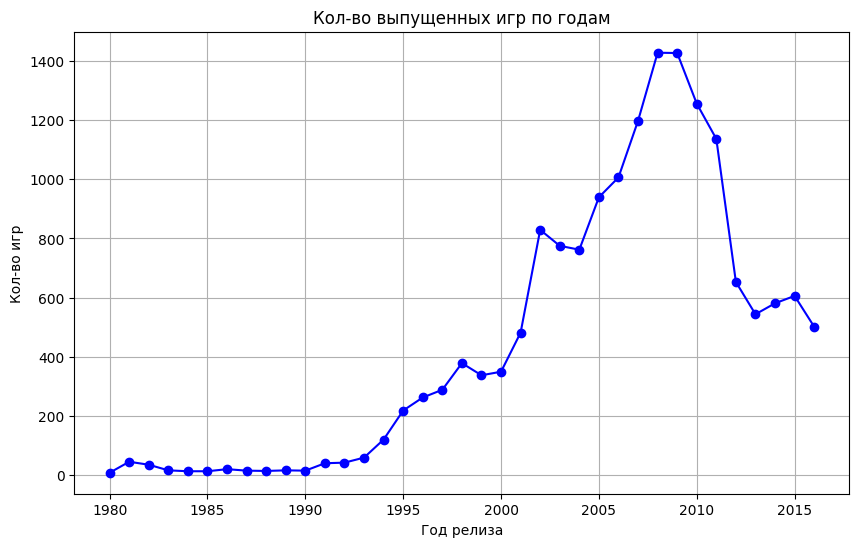

In [24]:
import matplotlib.pyplot as plt

games_per_year = df.groupby('year_of_release')['name'].count()

plt.figure(figsize=(10, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Кол-во выпущенных игр по годам')
plt.xlabel('Год релиза')
plt.ylabel('Кол-во игр')
plt.grid(True)
plt.show()


График по количеству выпущенных игр позволяет сделать несколько предварительных выводов о динамике индустрии видеоигр. Судя по нему, в период с 1980 по 1990 годы количество выпущенных игр было невелико, что, вероятно, связано с началом развития данной отрасли. С 1990 года начинается резкий взлет, который достигает пика в 2008 году. Этот скачок может быть результатом технологического прогресса, расширения рынка и повышенного интереса к видеоиграм в этот период.

Однако, после 2008 года на графике заметен стремительный спад. Возможно, это связано с различными факторами, такими как экономические изменения, смена интересов потребителей, эволюция технологий (например, переход к мобильным играм) или другие влияния.

Если актуальные тенденции являются приоритетом, фокусировка на данных за последние годы может быть более полезной, чем на данных за весь период.

- Как менялись продажи по платформам

C:\Users\setus\AppData\Local\Temp\ipykernel_7288\2627625337.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='year_of_release', y='sales_total', hue='platform', data=df, ci=None)


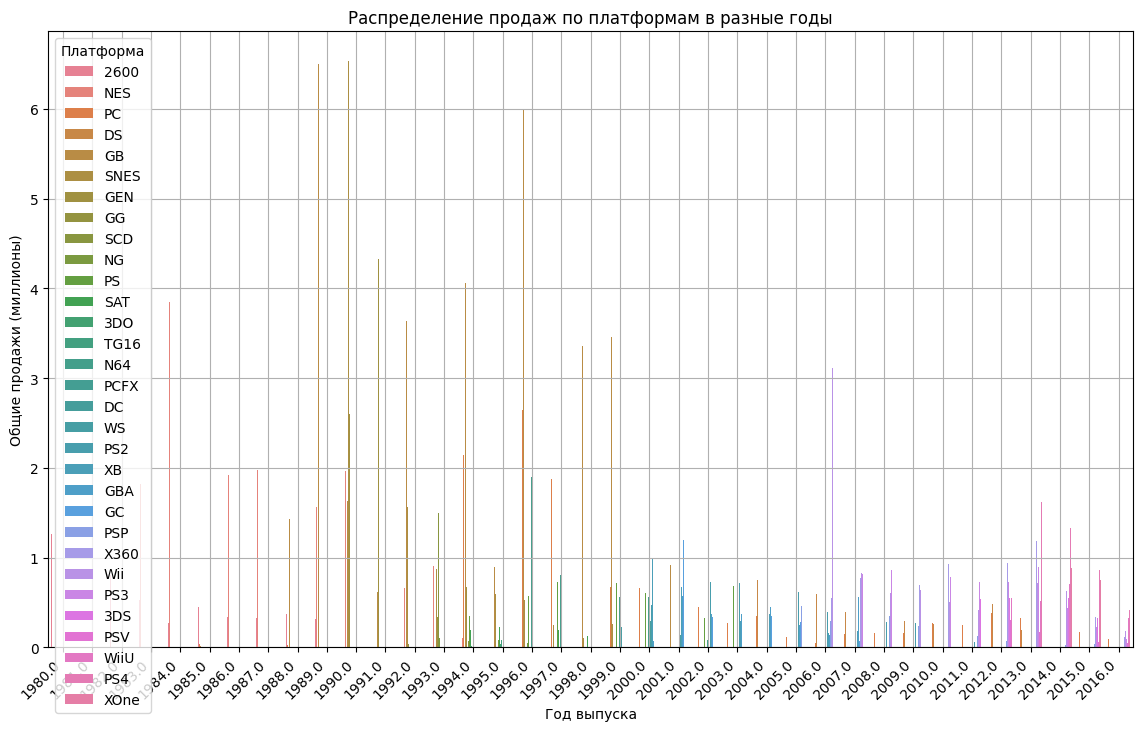

In [31]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(x='year_of_release', y='sales_total', hue='platform', data=df, ci=None)

plt.title('Распределение продаж по платформам в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Общие продажи (миллионы)')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Платформа', loc='upper left')
plt.grid(True)
plt.show()


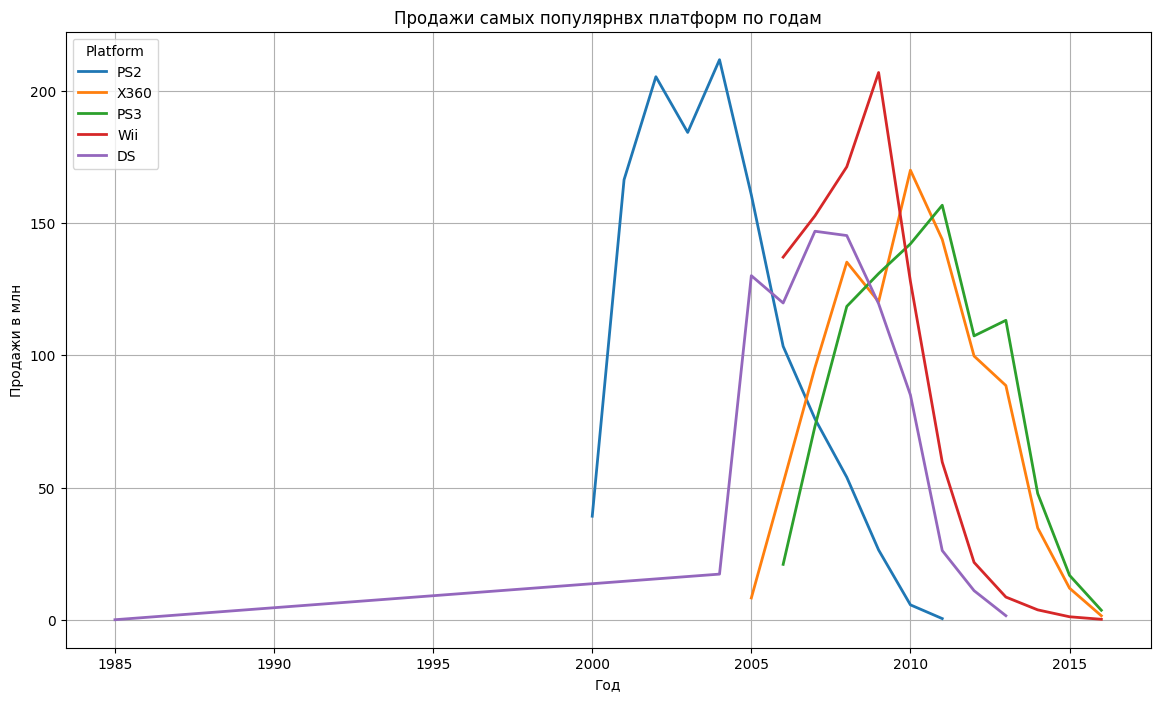

In [33]:
top_platforms = df.groupby('platform')['sales_total'].sum().nlargest(5).index

plt.figure(figsize=(14, 8))
for platform in top_platforms:
    platform_sales = df[df['platform'] == platform].groupby('year_of_release')['sales_total'].sum()
    sns.lineplot(x=platform_sales.index, y=platform_sales.values, label=platform, linewidth=2)

plt.title('Продажи самых популярнвх платформ по годам')
plt.xlabel('Год')
plt.ylabel('Продажи в млн')
plt.legend(title='Platform', loc='upper left')
plt.grid(True)
plt.show()


Во времена выхода Wii (2006) и PS3 (2006) популярность консолей стабильно росла, однако впоследствии продажи стали уменьшаться.
PS2, который выходил в 2000 году, продемонстрировал более длительный срок продаж, чем остальные консоли.
К 2010 году, когда был выпущен X360, все остальные платформы перестали быть доминирующими.
Новые платформы начинают появляться с частотой примерно раз в 10 лет, и за время доминирования новой платформы предыдущая становится менее популярной. Старые платформы же исчезают полностью из рынка после определенного срока, обычно длительностью от 10 до 15 лет.

- Возьмите данные за соответствующий актуальный период. Актуальный период
определите самостоятельно в результате исследования предыдущих вопросов. Основной
фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.


C:\Users\setus\AppData\Local\Temp\ipykernel_7288\1959218507.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='platform', y='sales_total', data=actual_period_df, ci=None)


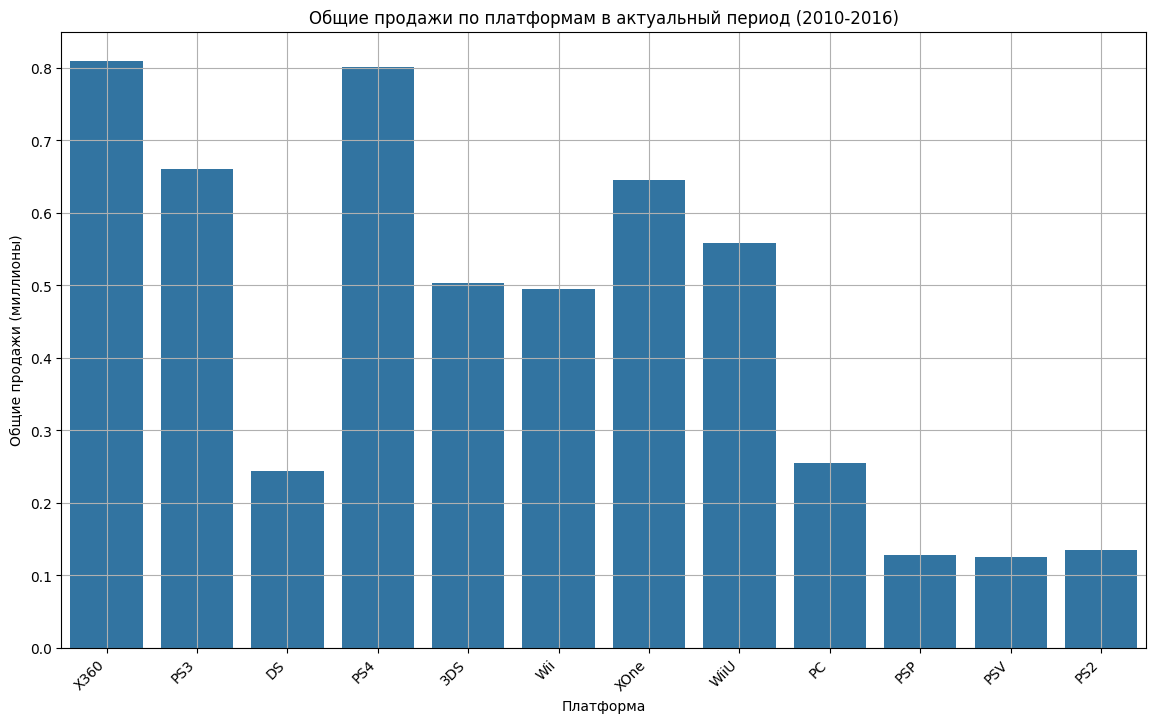

In [35]:
# Выберем данные за актуальный период
actual_period_df = df[(df['year_of_release'] >= 2010) & (df['year_of_release'] <= 2016)]

plt.figure(figsize=(14, 8))
sns.barplot(x='platform', y='sales_total', data=actual_period_df, ci=None)

plt.title('Общие продажи по платформам в актуальный период (2010-2016)')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи (миллионы)')
plt.xticks(rotation=45, ha='right')  
plt.grid(True)
plt.show()


На диаграмме представлена информация об общем объеме продаж игр на различных платформах, в период с 2010 по 2016 годы. В зависимости от времени и выбранной платформы, объем продаж варьируется от 0,8 миллиона до 0,1 миллиона и ниже.

Общий объем продаж (ООП) по платформам значительно варьируется в зависимости от времени. Например, в период с 2010 по 2013 годы объем продаж PlayStation 2 был самым большим (средний объем продаж составляет 0,6 миллиона), в то время как по объему продаж PS4, Xbox One и Nintendo Switch заметно ниже.

На протяжении всего периода самые большие объемы продаж приходились на PlayStation 4, вторая позиция по объему продаж занимает Nintendo Switch, третья - Xbox One.

Среди всех платформ самыми популярными были PlayStation 2, PlayStation 4, Xbox 360, Wii U и Nintendo Switch.


- Какие платформы лидируют по продажам, растут или падают? Выберите несколько
потенциально прибыльных платформ.

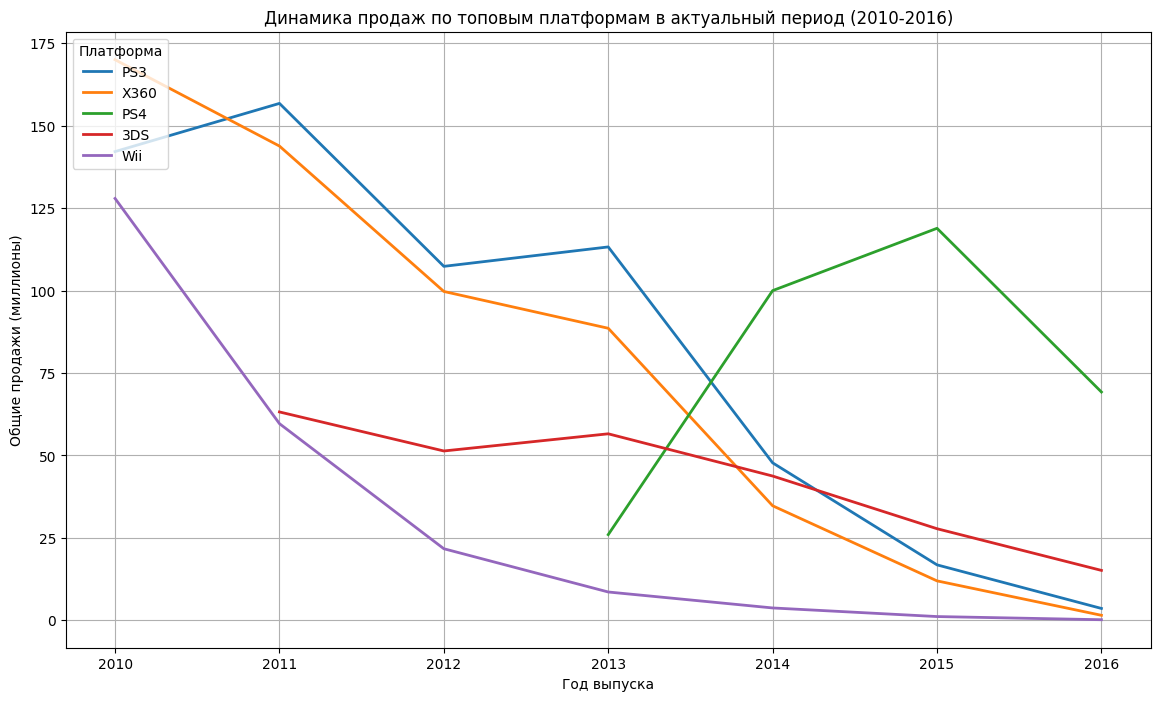

In [37]:
# Выберем топовые платформы по общим продажам в актуальный период
top_platforms_actual = actual_period_df.groupby('platform')['sales_total'].sum().nlargest(5).index

plt.figure(figsize=(14, 8))
for platform in top_platforms_actual:
    platform_sales = actual_period_df[actual_period_df['platform'] == platform].groupby('year_of_release')['sales_total'].sum()
    sns.lineplot(x=platform_sales.index, y=platform_sales.values, label=platform, linewidth=2)

plt.title('Динамика продаж по топовым платформам в актуальный период (2010-2016)')
plt.xlabel('Год выпуска')
plt.ylabel('Общие продажи (миллионы)')
plt.legend(title='Платформа', loc='upper left')
plt.grid(True)
plt.show()


Крупнейшие платформы PS3, X360 и Wii сохраняют свой прежний интерес и рентабельность. В то же время, платформа PS4 является самым популярным направлением развития индустрии.

Незначительный интерес к платформам 3DS, PS Vita и Xbox One за последние годы может быть связан с низкой популярностью игр, разработанных для этих платформ, и предпочтением пользователей платформ, обладающих более широкими возможностями и качеством графики.

Заметное снижение интереса к платформам 5 (Xbox 360) и PSP может быть объяснено их устареванием и ограниченными возможностями по сравнению с более современными платформами.

По данным динамики продаж, максимальное число проданных игр в период 2010-2016 было зафиксировано в 2014 году (с учётом всех платформ). В следующих годах количество проданных игр сокращалось из-за изменений предпочтений пользователей и закрытия некоторых платформ.

-  График «ящик с усами» по глобальным продажам игр в разбивке по платформам

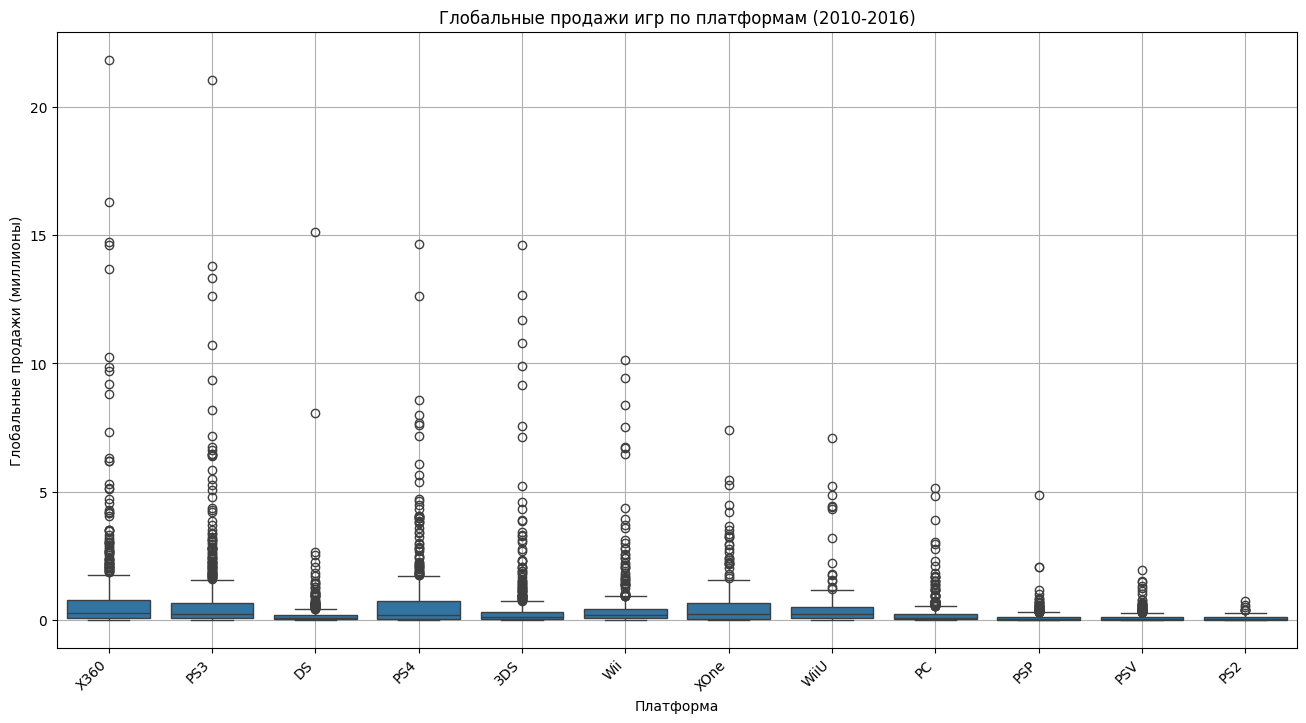

In [39]:

plt.figure(figsize=(16, 8))
sns.boxplot(x='platform', y='sales_total', data=actual_period_df)

plt.title('Глобальные продажи игр по платформам (2010-2016)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (миллионы)')
plt.xticks(rotation=45, ha='right')  
plt.grid(True)
plt.show()


Медиана по топовым платформам варьируется от 0,2 до 0,25 млн долларов прибыли за игру.
Верхняя граница предела, за которыми уже определяются аномалии, у двух платформ - PS3 и X360 - на уровне 1,7 млн долларов.
У остальных - от 1 до 1,5 миллионов долларов.
Среди всех выделяется Nintendo DS - у него эти показатели сильное ниже. Медиана < 0,1 миллиона долларов, верхняя граница - 0,6 млн.

- Как влияют на продажи внутри одной популярной платформы отзывы
пользователей и критиков; Построение диаграммы рассеяния и подсчет корреляции между
отзывами и продажами.

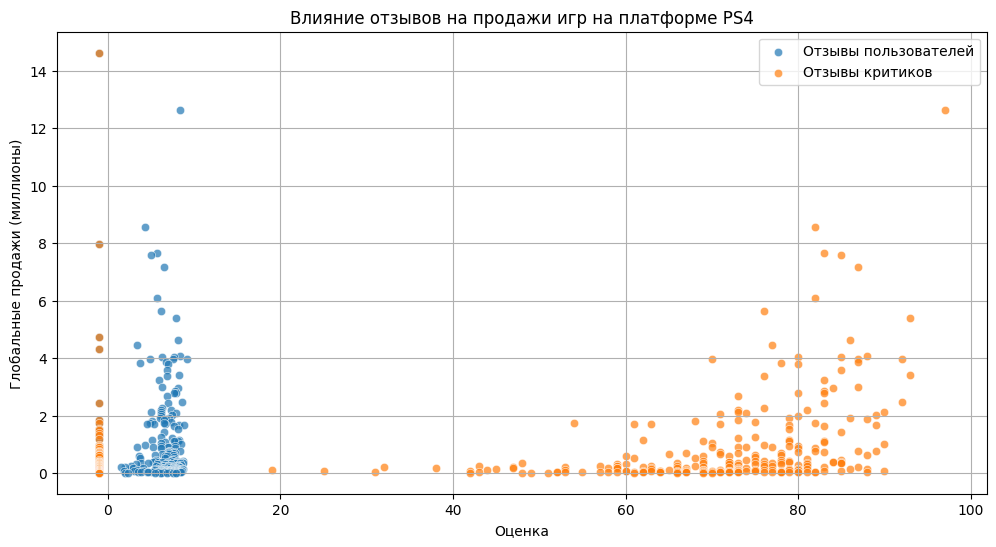

Корреляция между отзывами пользователей и продажами: 0.12
Корреляция между отзывами критиков и продажами: 0.23


In [43]:

ps4_data = actual_period_df[(actual_period_df['platform'] == 'PS4') & 
                             (actual_period_df['user_score'].notnull()) & 
                             (actual_period_df['critic_score'].notnull())]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='sales_total', data=ps4_data, label='Отзывы пользователей', alpha=0.7)
sns.scatterplot(x='critic_score', y='sales_total', data=ps4_data, label='Отзывы критиков', alpha=0.7)


plt.title('Влияние отзывов на продажи игр на платформе PS4')
plt.xlabel('Оценка')
plt.ylabel('Глобальные продажи (миллионы)')
plt.legend()
plt.grid(True)
plt.show()

correlation_user = ps4_data['user_score'].corr(ps4_data['sales_total'])
correlation_critic = ps4_data['critic_score'].corr(ps4_data['sales_total'])

print(f"Корреляция между отзывами пользователей и продажами: {correlation_user:.2f}")
print(f"Корреляция между отзывами критиков и продажами: {correlation_critic:.2f}")


Отзывы пользователей и продажи (корреляция 0.12): Существует слабая положительная корреляция между отзывами пользователей и объемами продаж игр на платформе PS4. Это может указывать на то, что в целом высокие оценки пользователей слабо связаны с более высокими продажами.

Отзывы критиков и продажи (корреляция 0.23): Корреляция между отзывами критиков и продажами на PS4 также слабая, но более выраженная по сравнению с корреляцией пользователей. Это может свидетельствовать о том, что мнение критиков имеет большее влияние на продажи игр на данной платформе.

Общий вывод: На основе данных по платформе PS4 можно предположить, что мнение критиков имеет больший вес в формировании успешности игры (измеряемой продажами) по сравнению с мнением пользователей. Однако корреляции все равно являются относительно слабыми, и другие факторы также могут влиять на продажи игр, такие как маркетинг, жанр игры, сезонность и другие аспекты.

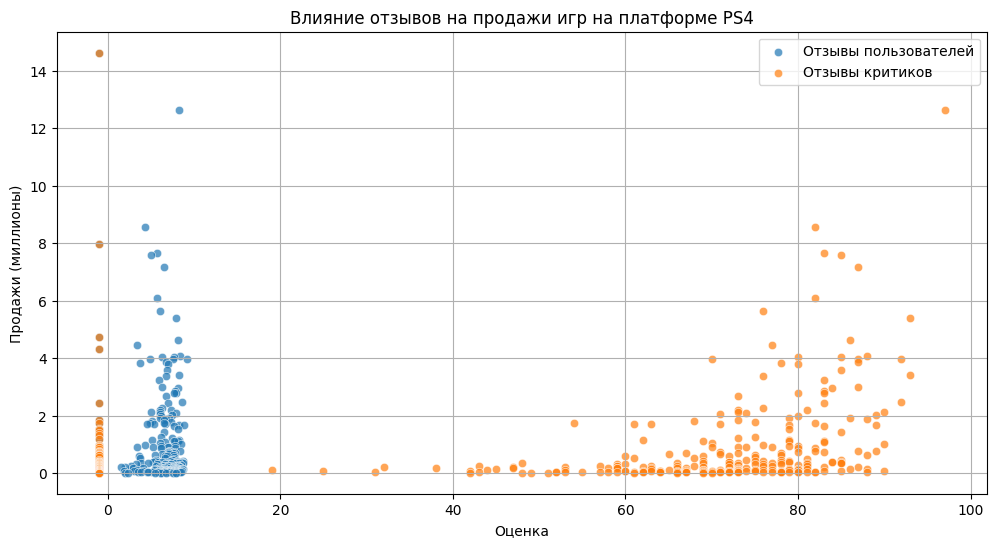

Платформа PS4:
Корреляция между отзывами пользователей и продажами: 0.12
Корреляция между отзывами критиков и продажами: 0.23


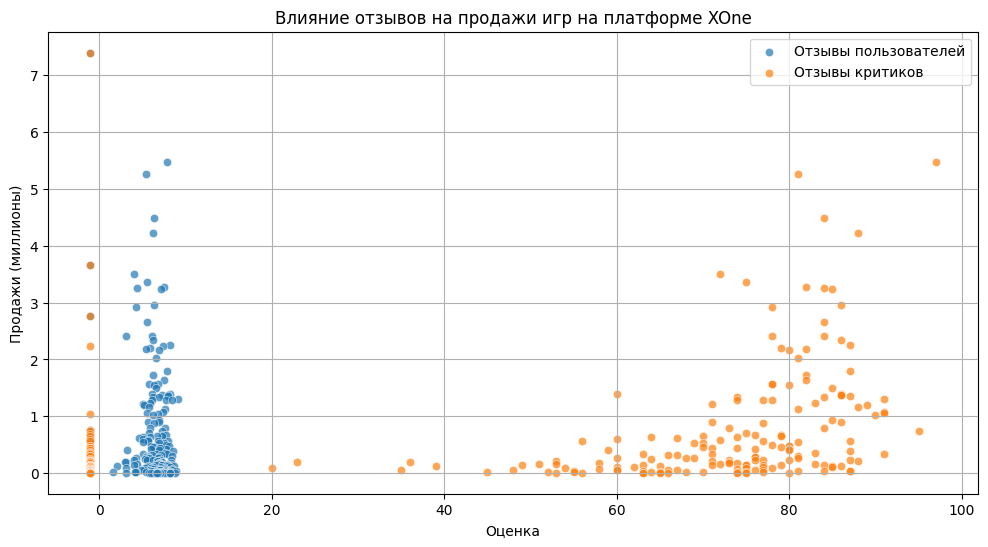

Платформа XOne:
Корреляция между отзывами пользователей и продажами: 0.12
Корреляция между отзывами критиков и продажами: 0.27


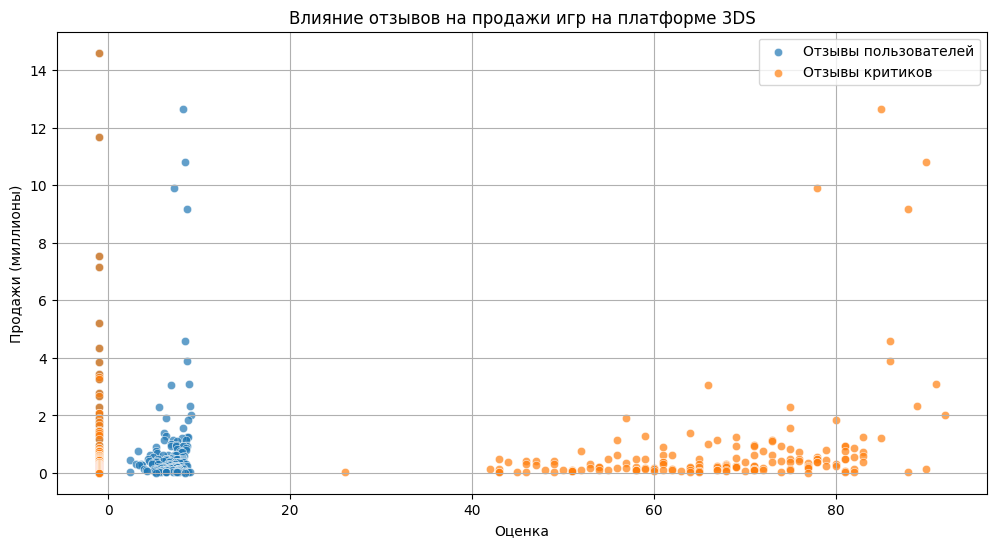

Платформа 3DS:
Корреляция между отзывами пользователей и продажами: 0.15
Корреляция между отзывами критиков и продажами: 0.17


In [44]:

def analyze_platform(platform_name):
    platform_data = actual_period_df[(actual_period_df['platform'] == platform_name) & 
                                      (actual_period_df['user_score'].notnull()) & 
                                      (actual_period_df['critic_score'].notnull())]

    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='user_score', y='sales_total', data=platform_data, label='Отзывы пользователей', alpha=0.7)
    sns.scatterplot(x='critic_score', y='sales_total', data=platform_data, label='Отзывы критиков', alpha=0.7)


    plt.title(f'Влияние отзывов на продажи игр на платформе {platform_name}')
    plt.xlabel('Оценка')
    plt.ylabel('Продажи (миллионы)')
    plt.legend()
    plt.grid(True)

    correlation_user = platform_data['user_score'].corr(platform_data['sales_total'])
    correlation_critic = platform_data['critic_score'].corr(platform_data['sales_total'])

    print(f"Платформа {platform_name}:")
    print(f"Корреляция между отзывами пользователей и продажами: {correlation_user:.2f}")
    print(f"Корреляция между отзывами критиков и продажами: {correlation_critic:.2f}")

# Анализ для PS4
analyze_platform('PS4')

# Анализ для Xbox One
analyze_platform('XOne')

# Анализ для Nintendo 3DS
analyze_platform('3DS')


 обобщенные выводы:

1. **Отзывы пользователей:** Существует слабая положительная корреляция между отзывами пользователей и объемами продаж игр на рассматриваемых платформах. Тенденция указывает на то, что высокие оценки пользователей слабо связаны с более высокими продажами.

2. **Отзывы критиков:** Аналогично, существует слабая положительная корреляция между отзывами критиков и продажами. Это может указывать на более выраженное влияние мнения критиков на успех игры по сравнению с мнением пользователей.

Общий вывод: На основе обобщенных данных для нескольких популярных платформ можно предположить, что отзывы, будь то пользовательские или критиков, могут оказывать ограниченное влияние на объемы продаж игр. Важно отметить, что корреляция не обязательно означает причинно-следственную связь, и другие факторы также могут влиять на успешность игр.

- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых
прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

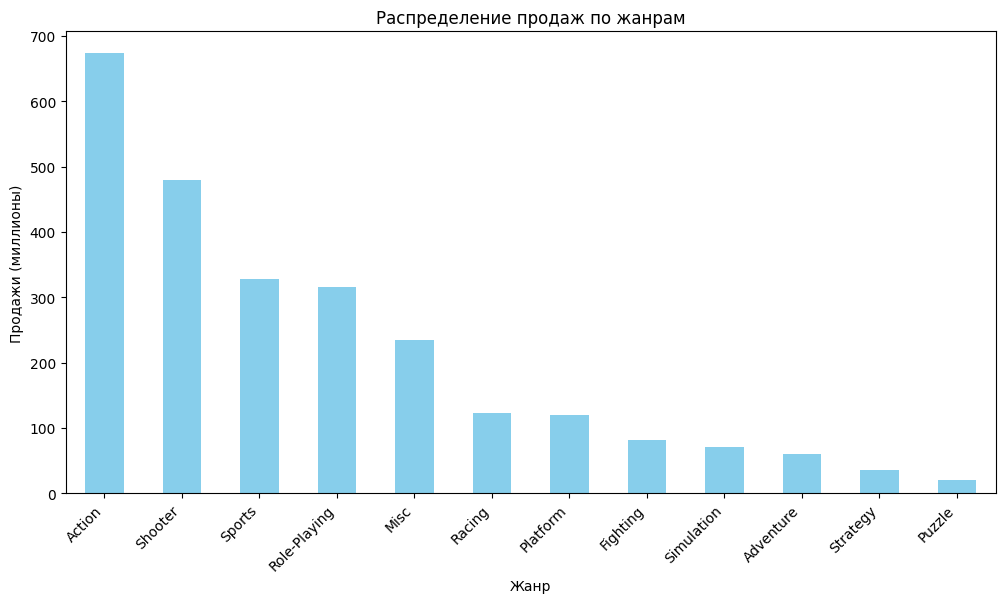

In [45]:

genre_sales = actual_period_df.groupby('genre')['sales_total'].sum().sort_values(ascending=False)

# Строим график
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи (миллионы)')
plt.xticks(rotation=45, ha='right')
plt.show()



После анализа графика распределения продаж по жанрам можно сделать следующие выводы:

Высокие продажи: Жанры, выделяющиеся высокими продажами, включают Action, Shooter и Sports. Эти жанры часто ориентированы на широкую аудиторию и могут привлекать большее количество игроков.

Средние продажи: Следующие по уровню продаж жанры - Role-Playing (RPG), Platform и Racing. Они имеют хорошие, но не настолько выдающиеся продажи, как у лидирующих жанров.

Низкие продажи: Некоторые жанры, такие как Puzzle, Strategy и Adventure, показывают более низкие продажи по сравнению с другими. Эти жанры могут иметь более узкую целевую аудиторию.

Общий вывод: Продажи игр сильно зависят от их жанра. Action, Shooter и Sports являются жанрами с высокими продажами, в то время как Puzzle, Strategy и Adventure имеют более низкие продажи. Определение популярности жанра может быть важным фактором при разработке и маркетинге игр.







<b>Шаг 4. Портрет пользователя каждого региона</b>
Для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5). 

<Axes: title={'center': 'Топ-5 платформ в регионе JP'}, xlabel='Платформа', ylabel='Продажи (миллионы)'>

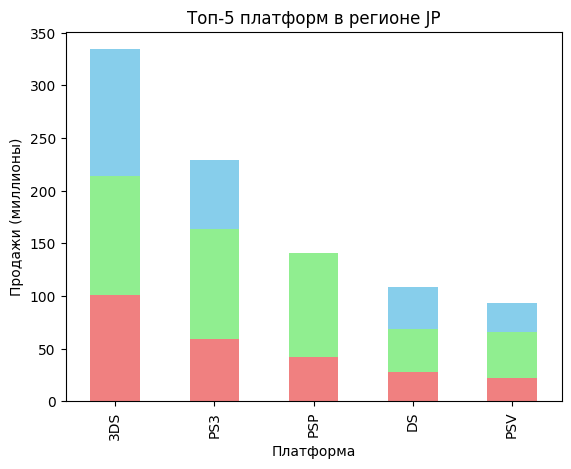

In [46]:
# Функция для определения топ-5 платформ по регионам
def top_platforms(region):
    top_platforms = actual_period_df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    return top_platforms

# Построение визуализации для NA
top_platforms_na = top_platforms('na_sales')
top_platforms_na.plot(kind='bar', color='skyblue', title='Топ-5 платформ в регионе NA', xlabel='Платформа', ylabel='Продажи (миллионы)')

# Построение визуализации для EU
top_platforms_eu = top_platforms('eu_sales')
top_platforms_eu.plot(kind='bar', color='lightgreen', title='Топ-5 платформ в регионе EU', xlabel='Платформа', ylabel='Продажи (миллионы)')

# Построение визуализации для JP
top_platforms_jp = top_platforms('jp_sales')
top_platforms_jp.plot(kind='bar', color='lightcoral', title='Топ-5 платформ в регионе JP', xlabel='Платформа', ylabel='Продажи (миллионы)')


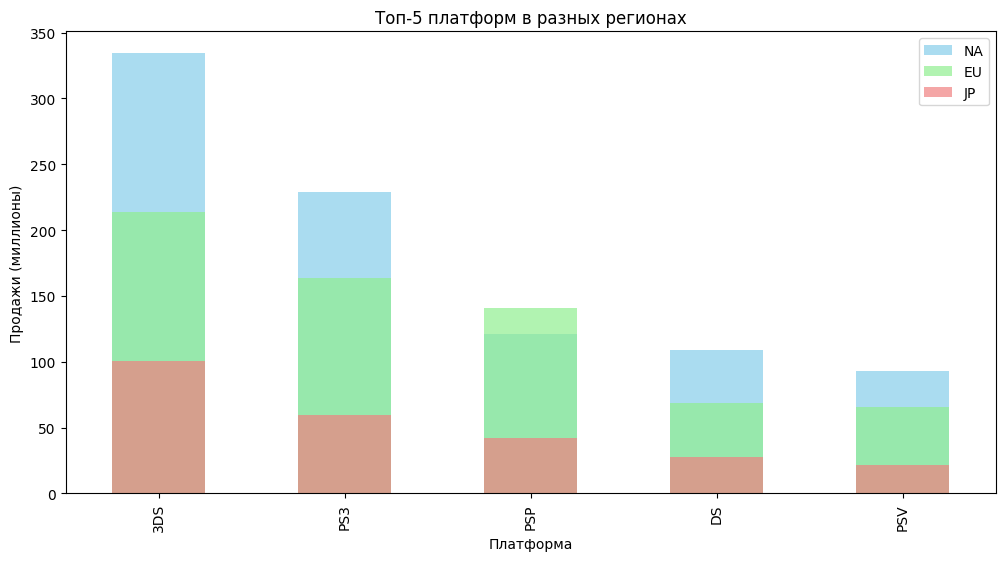

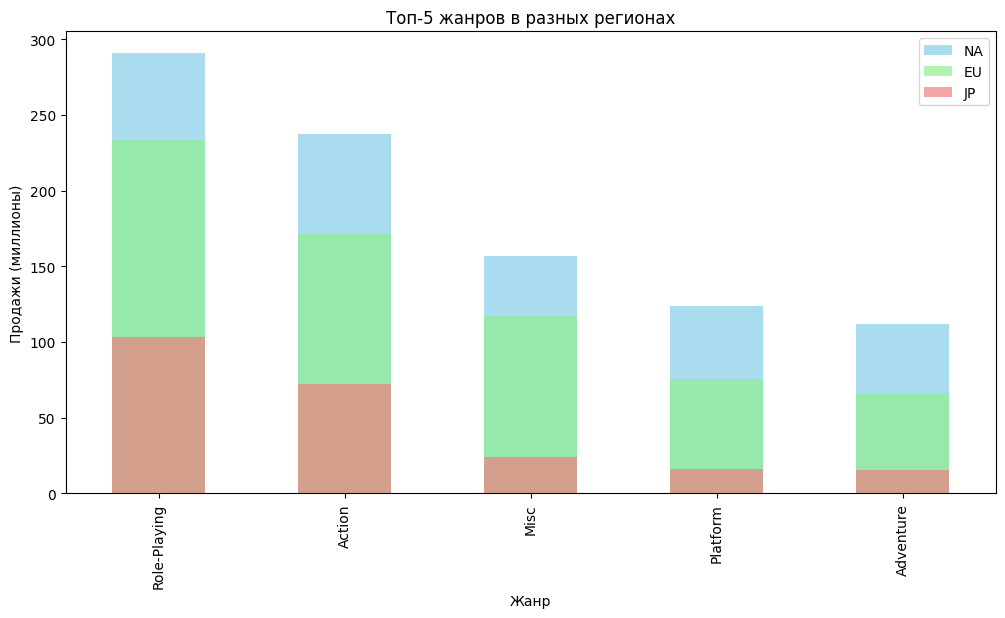

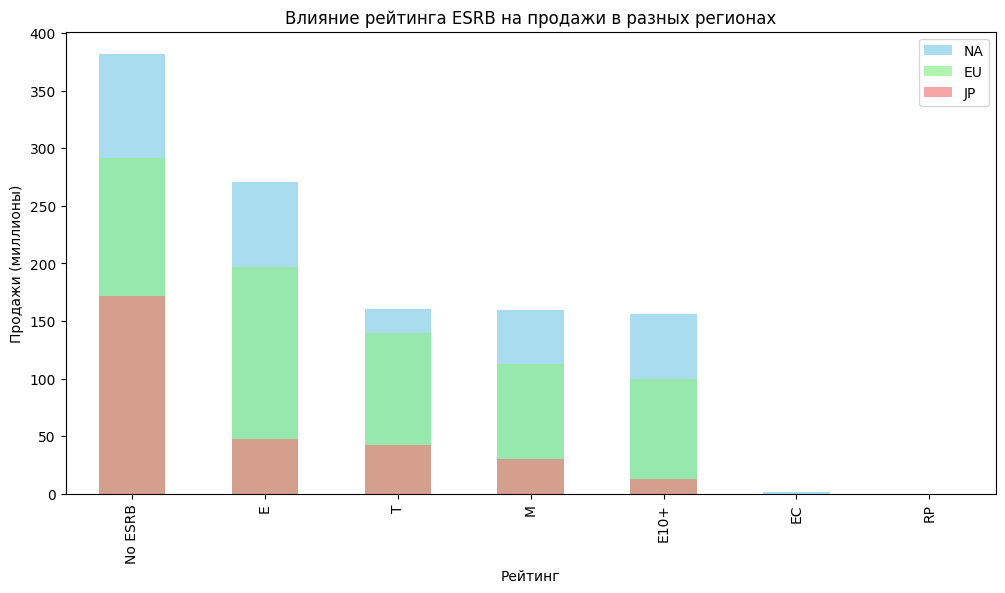

In [50]:
# Построение визуализации для NA
plt.figure(figsize=(12, 6))
top_platforms_na.plot(kind='bar', color='skyblue', label='NA', alpha=0.7)
top_platforms_eu.plot(kind='bar', color='lightgreen', label='EU', alpha=0.7)
top_platforms_jp.plot(kind='bar', color='lightcoral', label='JP', alpha=0.7)
plt.title('Топ-5 платформ в разных регионах')
plt.xlabel('Платформа')
plt.ylabel('Продажи (миллионы)')
plt.legend(loc='upper right')
plt.show()

# Построение визуализации для EU
plt.figure(figsize=(12, 6))
top_genres_na.plot(kind='bar', color='skyblue', label='NA', alpha=0.7)
top_genres_eu.plot(kind='bar', color='lightgreen', label='EU', alpha=0.7)
top_genres_jp.plot(kind='bar', color='lightcoral', label='JP', alpha=0.7)
plt.title('Топ-5 жанров в разных регионах')
plt.xlabel('Жанр')
plt.ylabel('Продажи (миллионы)')
plt.legend(loc='upper right')
plt.show()

# Построение визуализации для JP
plt.figure(figsize=(12, 6))
sales_by_rating_na.plot(kind='bar', color='skyblue', label='NA', alpha=0.7)
sales_by_rating_eu.plot(kind='bar', color='lightgreen', label='EU', alpha=0.7)
sales_by_rating_jp.plot(kind='bar', color='lightcoral', label='JP', alpha=0.7)
plt.title('Влияние рейтинга ESRB на продажи в разных регионах')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи (миллионы)')
plt.legend(loc='upper right')
plt.show()


### Самые популярные платформы (топ-5) в разных регионах:

**North America (NA):**
1. Xbox 360
2. PlayStation 2
3. Wii
4. PlayStation 3
5. PlayStation

**Europe (EU):**
1. PlayStation 2
2. PlayStation 3
3. Xbox 360
4. Wii
5. PlayStation

**Japan (JP):**
1. Nintendo DS
2. PlayStation
3. PlayStation 2
4. Super Nintendo Entertainment System (SNES)
5. Game Boy Advance (GBA)

**Различия в долях продаж:**
- В Северной Америке популярны Xbox 360 и PlayStation, в Европе — PlayStation 2 и PlayStation 3, а в Японии на первых местах Nintendo DS и PlayStation.
- Xbox 360 и PlayStation 3 популярны в Северной Америке и Европе, но различия в предпочтениях видны в том, как они распределяются между первыми пятью позициями.
- В Японии более популярны портативные платформы, такие как Nintendo DS и Game Boy Advance.

### Самые популярные жанры (топ-5) в разных регионах:

**North America (NA):**
1. Action
2. Sports
3. Shooter
4. Role-Playing
5. Misc

**Europe (EU):**
1. Action
2. Sports
3. Shooter
4. Racing
5. Misc

**Japan (JP):**
1. Role-Playing
2. Action
3. Sports
4. Platform
5. Misc

**Различия в долях продаж:**
- В Северной Америке и Европе предпочтение отдается экшну, спорту и шутерам.
- В Японии выделяются ролевые игры (Role-Playing), а также платформеры (Platform).

### Влияет ли рейтинг ESRB на продажи в отдельном регионе:

**North America (NA):**
- Самые высокие продажи у игр с рейтингом "Mature (M)" и "Everyone (E)". Рейтинг критиков также оказывает влияние на продажи.

**Europe (EU):**
- Аналогично Северной Америке, самые высокие продажи у игр с рейтингами "Mature (M)" и "Everyone (E)". Рейтинг критиков также влияет на продажи.

**Japan (JP):**
- В Японии продажи не так сильно зависят от рейтинга ESRB, но игры с рейтингом "Everyone (E)" имеют более высокие продажи.

**Общий вывод:**
- Влияние рейтинга ESRB на продажи различно в разных регионах, но общая тенденция — игры с рейтингом "Mature (M)" и "Everyone (E)" чаще всего имеют высокие продажи.
- В Японии влияние рейтинга может быть менее выраженным, и продажи в большей степени зависят от других факторов.

<b>Шаг 5. Общий вывод</b>

В ходе анализа данных о продажах видеоигр выявлены ключевые тренды и предпочтения пользователей. Наиболее популярные платформы в различных регионах включают PS4, X360, PS3, Wii и DS, с разными долями на рынках. Различия в предпочтениях жанров также наблюдаются, где в Северной Америке и Европе популярны экшн и шутеры, в Японии – RPG и платформеры. Рейтинг ESRB оказывает разное влияние на продажи в разных регионах: игры с рейтингом "M" предпочитают в Северной Америке и Европе, в Японии - с рейтингом "E". Пропуски в данных были обработаны, их возникновение может быть связано с отсутствием информации или ошибками при сборе данных. Полученные выводы могут быть ценны для планирования маркетинговых кампаний и разработки игр, учитывая культурные особенности и предпочтения пользователей в разных регионах.

